**RAISIN-DATASET**

https://archive.ics.uci.edu/dataset/850/raisin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Library untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Library untuk deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
#@title Load Dataset
df = pd.read_excel('/content/Raisin_Dataset.xlsx')
print(f"Shape: {df.shape}")
df.head()

Shape: (900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


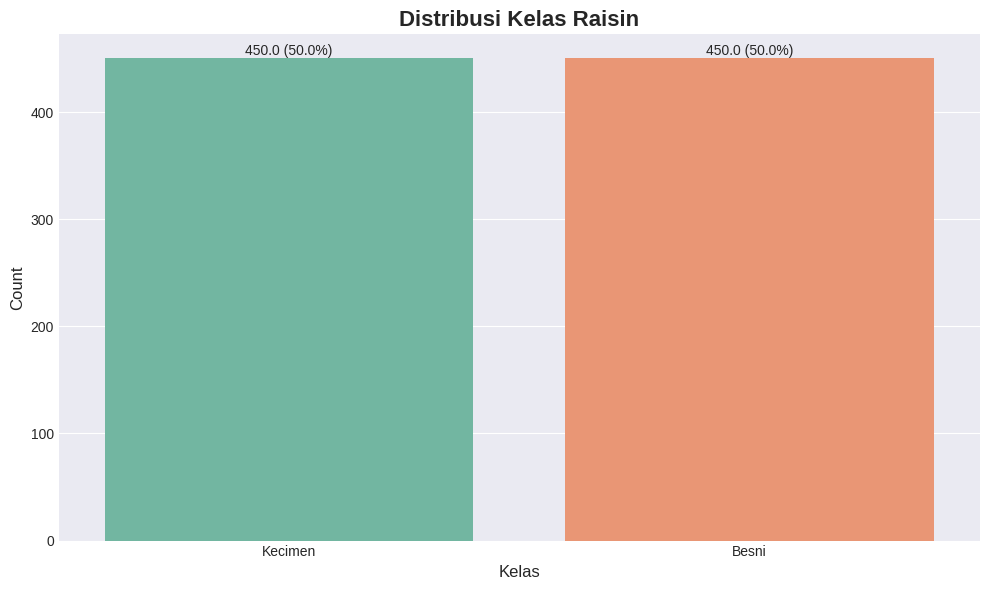

In [3]:
import os

# Visualisasi 1: Distribusi Kelas
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Distribusi Kelas Raisin', fontsize=16, fontweight='bold')
plt.xlabel('Kelas', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Tambahkan label persentase
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            f'{height} ({height/len(df)*100:.1f}%)',
            ha='center', fontsize=10)
plt.tight_layout()

# Pastikan direktori 'images' ada sebelum menyimpan
os.makedirs('images', exist_ok=True)
plt.savefig('images/class_distribution.png', dpi=300, bbox_inches='tight') # Save first
plt.show() # Then show
plt.close() # Close the figure to free memory

In [4]:
import os
import shutil

# Create the 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)
print("Directory 'data' created or already exists.")

# Define the source and destination paths for the dataset
source_filepath = '/content/Raisin_Dataset.xlsx'
destination_filepath = 'data/Raisin_Dataset.xlsx'

# Copy the dataset to the 'data' folder
shutil.copy(source_filepath, destination_filepath)
print(f"Dataset '{os.path.basename(source_filepath)}' copied to '{os.path.dirname(destination_filepath)}'.")

# Verify the file is in the new directory
if os.path.exists(destination_filepath):
    print(f"File '{os.path.basename(destination_filepath)}' successfully placed in the 'data' folder.")
else:
    print("Failed to copy the dataset.")

Directory 'data' created or already exists.
Dataset 'Raisin_Dataset.xlsx' copied to 'data'.
File 'Raisin_Dataset.xlsx' successfully placed in the 'data' folder.


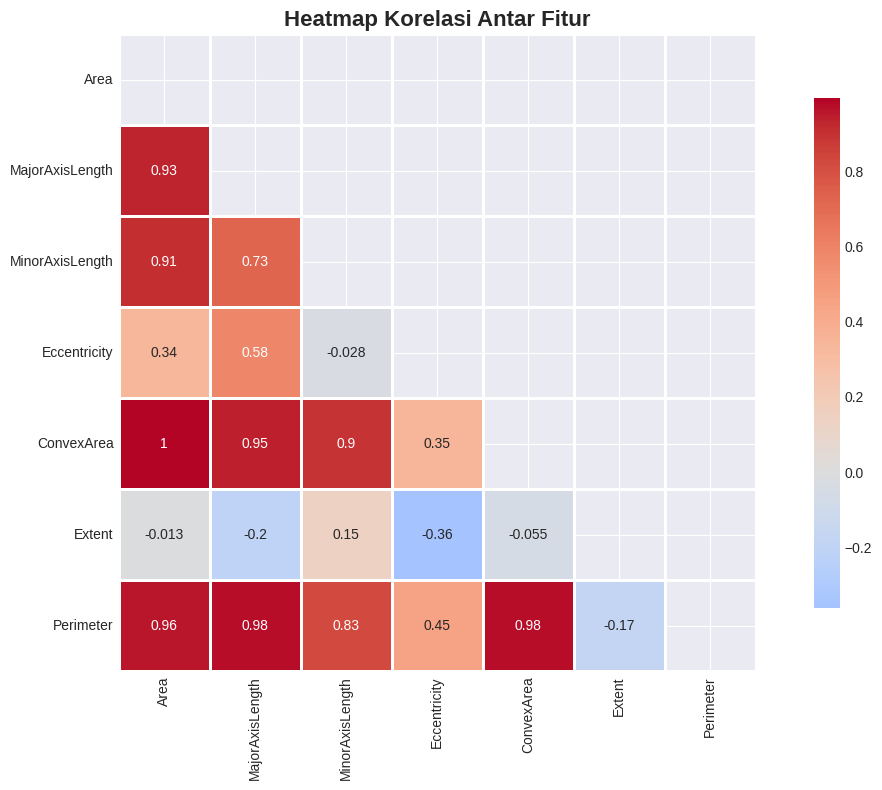

In [5]:
# Visualisasi 2: Korelasi antar fitur
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16, fontweight='bold')
plt.tight_layout()

# Pastikan direktori 'images' ada sebelum menyimpan
os.makedirs('images', exist_ok=True)
plt.savefig('images/correlation_heatmap.png', dpi=300, bbox_inches='tight') # Save first
plt.show() # Then show
plt.close() # Close the figure to free memory

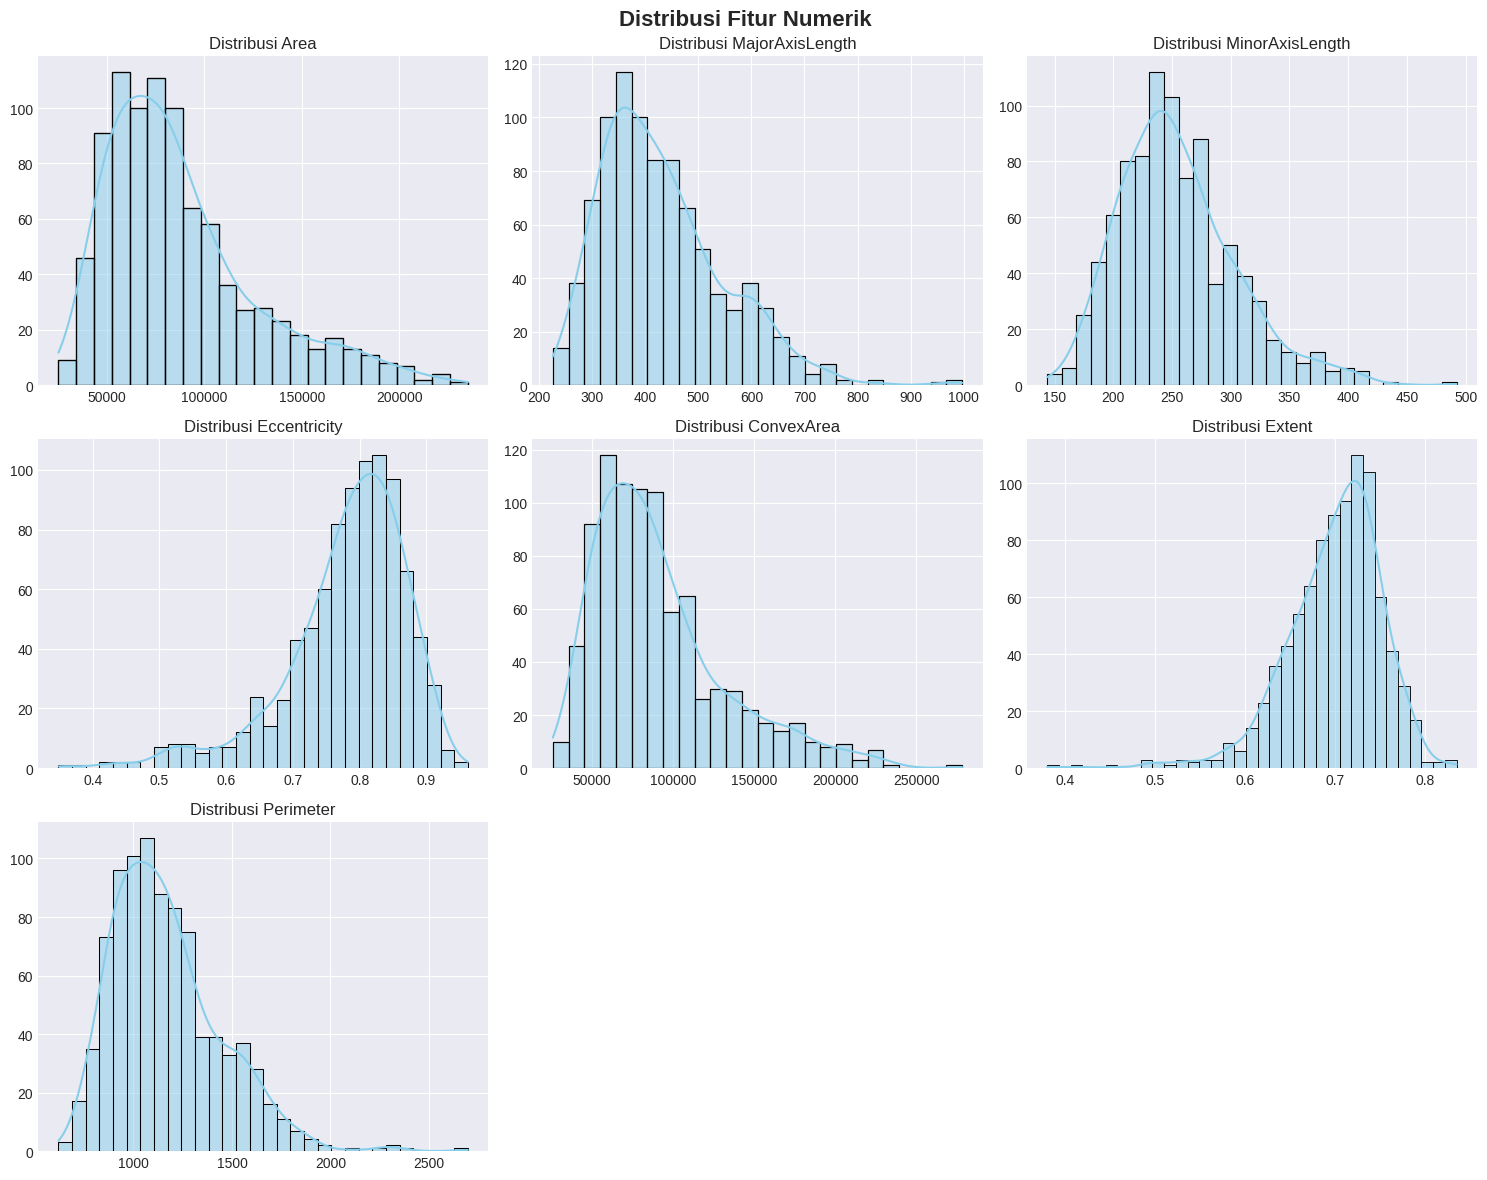

In [6]:
# Visualisasi 3: Distribusi fitur numerik
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
for i, feature in enumerate(numerical_features):
    if i < len(axes):
        ax = axes[i]
        sns.histplot(df[feature], kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Distribusi {feature}', fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('')

# Hapus axes yang tidak terpakai
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Distribusi Fitur Numerik', fontsize=16, fontweight='bold')
plt.tight_layout()

# Pastikan direktori 'images' ada sebelum menyimpan
os.makedirs('images', exist_ok=True)
plt.savefig('images/numerical_feature_distribution.png', dpi=300, bbox_inches='tight') # Save first
plt.show() # Then show
plt.close() # Close the figure to free memory

In [7]:
#@title DATA PREPARATION
# Encoding target variable
print("Encoding Target Variable...")
le = LabelEncoder()
df['Class_encoded'] = le.fit_transform(df['Class'])
print(f"   Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Encoding Target Variable...
   Mapping: {'Besni': np.int64(0), 'Kecimen': np.int64(1)}


In [8]:
# Split features dan target
X = df.drop(['Class', 'Class_encoded'], axis=1)
y = df['Class_encoded']
print(f"\n Split data:")
print(f"   X shape: {X.shape}")
print(f"   y shape: {y.shape}")


 Split data:
   X shape: (900, 7)
   y shape: (900,)


In [9]:
# Split data training dan testing
print("\n Split data training dan testing...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"   X_train shape: {X_train.shape}")
print(f"   X_test shape: {X_test.shape}")
print(f"   y_train shape: {y_train.shape}")
print(f"   y_test shape: {y_test.shape}")


 Split data training dan testing...
   X_train shape: (720, 7)
   X_test shape: (180, 7)
   y_train shape: (720,)
   y_test shape: (180,)


In [10]:
# Scaling fitur numerik
print("\n Scaling fitur...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Scaling fitur...


In [11]:
# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test, model_name, le_encoder):
    y_pred = model.predict(X_test)

    # Untuk model DL yang output probability
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)
    else:
        y_pred_proba = None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n HASIL EVALUASI {model_name}:")
    print(f"   Accuracy : {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall   : {recall:.4f}")
    print(f"   F1-Score : {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_encoder.classes_, yticklabels=le_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(f'images/confusion_matrix_{model_name.replace(" ", "_").lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Classification Report
    print("\n CLASSIFICATION REPORT:")
    print(classification_report(y_test, y_pred, target_names=le_encoder.classes_))

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }


 TRAINING MODEL BASELINE (Logistic Regression)
----------------------------------------

 HASIL EVALUASI Logistic Regression:
   Accuracy : 0.8889
   Precision: 0.8938
   Recall   : 0.8889
   F1-Score : 0.8885


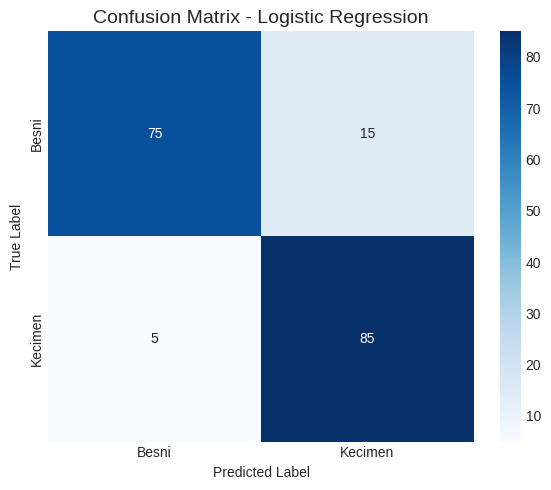


 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       Besni       0.94      0.83      0.88        90
     Kecimen       0.85      0.94      0.89        90

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



In [12]:
#@title MODEL 1: Baseline (Logistic Regression)
print("\n TRAINING MODEL BASELINE (Logistic Regression)")
print("-" * 40)

model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_scaled, y_train)
results_lr = evaluate_model(model_lr, X_test_scaled, y_test, "Logistic Regression", le_encoder=le)
plt.close() # Close the figure generated by evaluate_model to free memory


 TRAINING MODEL ADVANCED (Random Forest)
----------------------------------------

 HASIL EVALUASI Random Forest:
   Accuracy : 0.8556
   Precision: 0.8704
   Recall   : 0.8556
   F1-Score : 0.8541


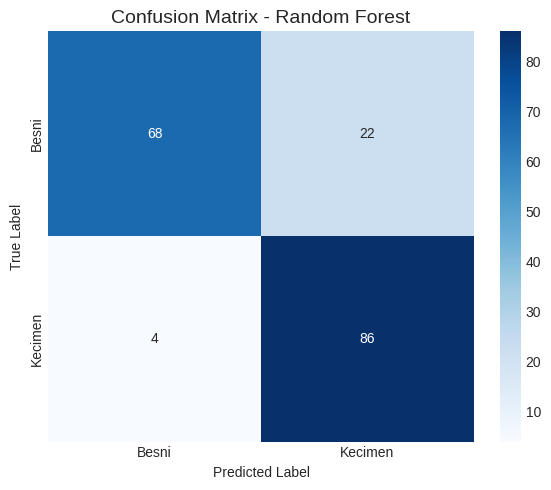


 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       Besni       0.94      0.76      0.84        90
     Kecimen       0.80      0.96      0.87        90

    accuracy                           0.86       180
   macro avg       0.87      0.86      0.85       180
weighted avg       0.87      0.86      0.85       180



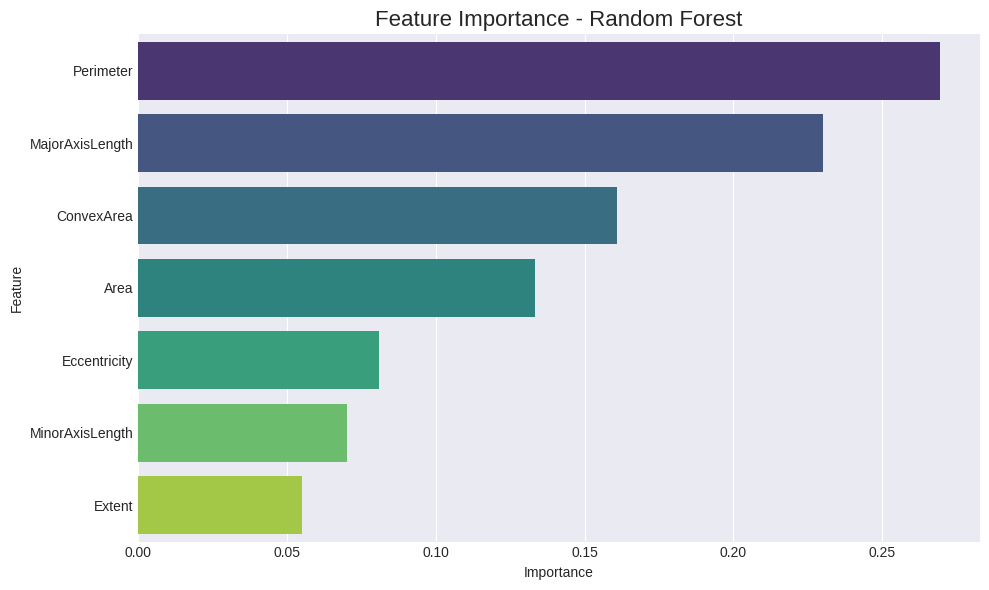

In [13]:
#@title MODEL 2: Advanced (Random Forest)
print("\n TRAINING MODEL ADVANCED (Random Forest)")
print("-" * 40)

model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
model_rf.fit(X_train_scaled, y_train)
results_rf = evaluate_model(model_rf, X_test_scaled, y_test, "Random Forest", le_encoder=le)
plt.close() # Close the figure generated by evaluate_model to free memory

# Feature Importance untuk Random Forest
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance - Random Forest', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

# Pastikan direktori 'images' ada sebelum menyimpan
os.makedirs('images', exist_ok=True)
plt.savefig('images/feature_importance.png', dpi=300, bbox_inches='tight') # Save first
plt.show()
plt.close() # Close the figure to free memory


 TRAINING DEEP LEARNING MODEL (MLP)
----------------------------------------
 MODEL ARCHITECTURE:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)


 START TRAINING...
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6912 - loss: 0.6144 - val_accuracy: 0.9167 - val_loss: 0.3985
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8333 - loss: 0.4650 - val_accuracy: 0.9167 - val_loss: 0.2692
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8329 - loss: 0.4096 - val_accuracy: 0.9236 - val_loss: 0.2379
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8618 - loss: 0.3521 - val_accuracy: 0.9236 - val_loss: 0.2282
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8515 - loss: 0.3648 - val_accuracy: 0.9236 - val_loss: 0.2362
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8660 - loss: 0.3505 - val_accuracy: 0.9236 - val_loss: 0.2290
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8554 - loss: 0.3934 - val_accuracy: 0.9236 - val_loss: 0.2290
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8578 - loss: 0.3545 - val_

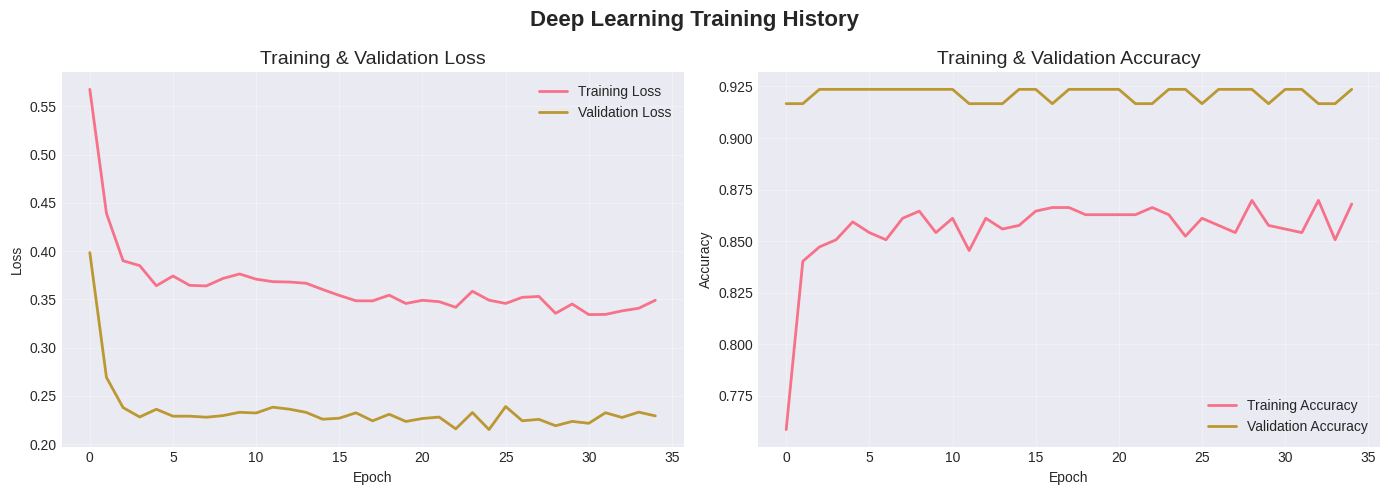


 EVALUASI MODEL DEEP LEARNING:
   Test Loss: 0.3690
   Test Accuracy: 0.8778
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


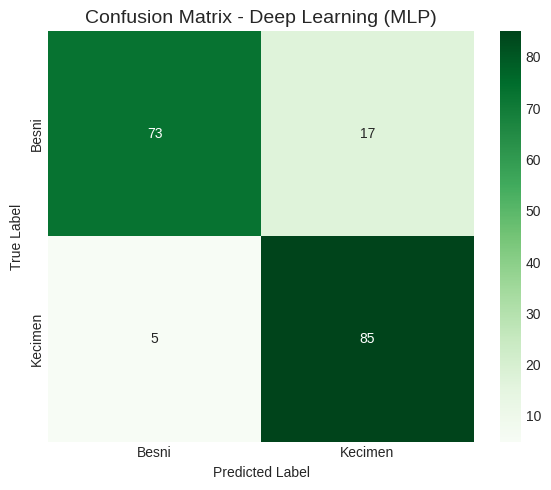


 CLASSIFICATION REPORT - Deep Learning:
              precision    recall  f1-score   support

       Besni       0.94      0.81      0.87        90
     Kecimen       0.83      0.94      0.89        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



In [14]:
#@title MODEL 3: Deep Learning (MLP)
print("\n TRAINING DEEP LEARNING MODEL (MLP)")
print("-" * 40)

# Build model
model_mlp = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_mlp.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Print model summary
print(" MODEL ARCHITECTURE:")
model_mlp.summary()

# Training
print("\n START TRAINING...")
history = model_mlp.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Training & Validation Loss', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot Accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_title('Training & Validation Accuracy', fontsize=14)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Deep Learning Training History', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('images/history_loss_accuracy.png', dpi=300, bbox_inches='tight')  # Save training history plot
plt.show()
plt.close() # Close the figure to free memory

# Evaluasi model DL
print("\n EVALUASI MODEL DEEP LEARNING:")
loss, accuracy = model_mlp.evaluate(X_test_scaled, y_test, verbose=0)
print(f"   Test Loss: {loss:.4f}")
print(f"   Test Accuracy: {accuracy:.4f}")

# Predict dengan model DL
y_pred_dl = (model_mlp.predict(X_test_scaled) > 0.5).astype(int).flatten()

# Hitung metrics untuk DL
accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl, average='weighted')
recall_dl = recall_score(y_test, y_pred_dl, average='weighted')
f1_dl = f1_score(y_test, y_pred_dl, average='weighted')

results_dl = {
    'accuracy': accuracy_dl,
    'precision': precision_dl,
    'recall': recall_dl,
    'f1': f1_dl,
    'y_pred': y_pred_dl
}

# Confusion Matrix untuk DL
plt.figure(figsize=(6, 5))
cm_dl = confusion_matrix(y_test, y_pred_dl)
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Deep Learning (MLP)', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('images/confusion_matrix_deep_learning.png', dpi=300, bbox_inches='tight') # Save DL confusion matrix
plt.show()
plt.close() # Close the figure to free memory

print("\n CLASSIFICATION REPORT - Deep Learning:")
print(classification_report(y_test, y_pred_dl, target_names=le.classes_))

In [15]:
# Buat dataframe perbandingan
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Deep Learning (MLP)'],
    'Accuracy': [results_lr['accuracy'], results_rf['accuracy'], results_dl['accuracy']],
    'Precision': [results_lr['precision'], results_rf['precision'], results_dl['precision']],
    'Recall': [results_lr['recall'], results_rf['recall'], results_dl['recall']],
    'F1-Score': [results_lr['f1'], results_rf['f1'], results_dl['f1']]
})

print("📊 TABEL PERBANDINGAN MODEL:")
print(comparison_df.to_string(index=False))

📊 TABEL PERBANDINGAN MODEL:
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.888889   0.893750 0.888889  0.888545
      Random Forest  0.855556   0.870370 0.855556  0.854097
Deep Learning (MLP)  0.877778   0.884615 0.877778  0.877232


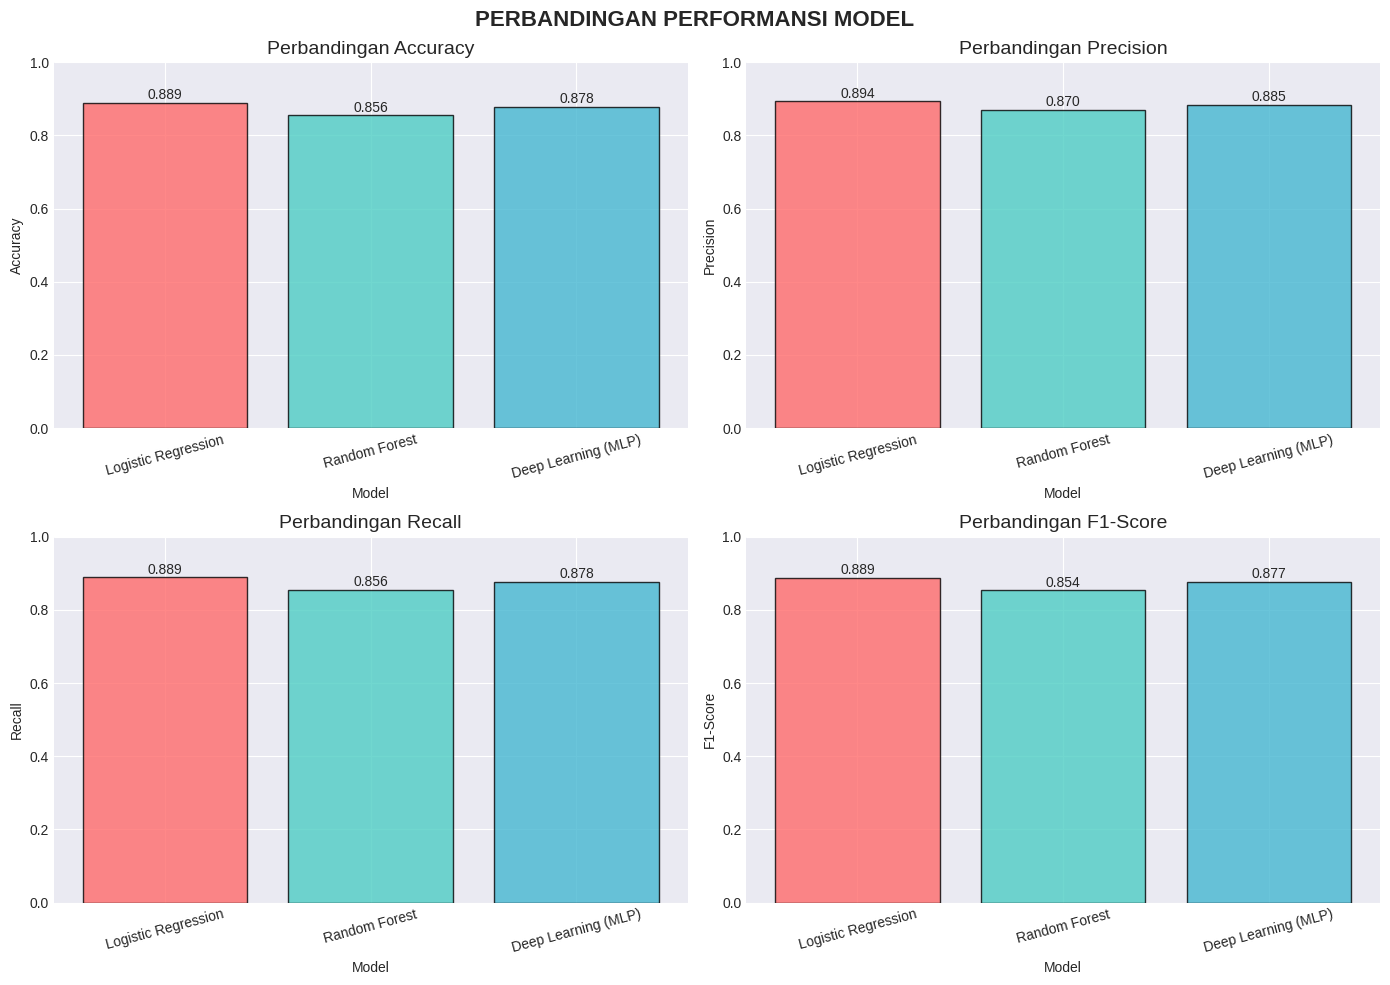

In [16]:
# Visualisasi perbandingan
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    x = np.arange(len(comparison_df['Model']))
    ax.bar(x, comparison_df[metric], color=colors, alpha=0.8, edgecolor='black')

    ax.set_title(f'Perbandingan {metric}', fontsize=14)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_xticks(x)
    ax.set_xticklabels(comparison_df['Model'], rotation=15)
    ax.set_ylim([0, 1])

    # Tambahkan nilai di atas bar
    for i, v in enumerate(comparison_df[metric]):
        ax.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=10)

plt.suptitle('PERBANDINGAN PERFORMANSI MODEL', fontsize=16, fontweight='bold')
plt.tight_layout()

# Pastikan direktori 'images' ada sebelum menyimpan
os.makedirs('images', exist_ok=True)
plt.savefig('images/model_performance_comparison.png', dpi=300, bbox_inches='tight') # Save first
plt.show() # Then show
plt.close() # Close the figure to free memory

In [17]:
# Tentukan model terbaik
best_model_idx = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Accuracy']

print(f"\n MODEL TERBAIK: {best_model}")
print(f"   Dengan akurasi: {best_accuracy:.4f}")


 MODEL TERBAIK: Logistic Regression
   Dengan akurasi: 0.8889


In [18]:
import os
import joblib

# Create 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save Logistic Regression model
joblib.dump(model_lr, 'models/logistic_regression_model.pkl')
print("Logistic Regression model saved to models/logistic_regression_model.pkl")

# Save Random Forest model
joblib.dump(model_rf, 'models/random_forest_model.pkl')
print("Random Forest model saved to models/random_forest_model.pkl")

# Save Deep Learning (MLP) model
model_mlp.save('models/deep_learning_mlp_model.h5')
print("Deep Learning (MLP) model saved to models/deep_learning_mlp_model.h5")

Logistic Regression model saved to models/logistic_regression_model.pkl
Random Forest model saved to models/random_forest_model.pkl
Deep Learning (MLP) model saved to models/deep_learning_mlp_model.h5
